In [1]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
pip install tensorflow

     |████████████████████████████████| 165.2 MB 237 kB/s eta 0:00:01    |████████████████▍               | 84.4 MB 2.6 MB/s eta 0:00:32
     |████████████████████████████████| 127 kB 518 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 3.3 MB 104 kB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 997 kB/s eta 0:00:01
     |████████████████████████████████| 298 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 963 kB/s eta 0:00:01
     |████████████████████████████████| 779 kB 

# Exploratory Data Analysis (FEMA)

In [38]:
import time
import geopandas
import shapely
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
import matplotlib as mpt
import matplotlib.pyplot as plt
import kaleido
import numpy as np
import datetime
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from scipy.stats import zscore
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import TimeSeriesSplit
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import cm
from yellowbrick.features import Rank2D
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.features import PCA
from yellowbrick.classifier import ROCAUC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.cluster import InterclusterDistance
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
fema_vr = pd.read_csv(r"/Users/victoriawarner/Desktop/FEMA.csv")

In [4]:
fema_vr = fema_vr[fema_vr['incidentType']!="Biological"]
fema_vr = fema_vr[fema_vr['incidentType']!="Fire"]
fema_vr.head(10)

,Unnamed: 0,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,...,totalObligatedAmountPa,totalObligatedAmountCatAb,totalObligatedAmountCatC2g,paLoadDate,iaLoadDate,totalObligatedAmountHmgp,DecDatekey,IncidentEndDateKey,IncidentBeginDatekey,CloseOutDatekey
0,0,1306,FL,DR,10884,2000,Hurricane,0,0,1,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,35-10884,35-10888,35-10878,35--106751
1,1,1306,FL,DR,10884,2000,Hurricane,0,1,1,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,86-10884,86-10888,86-10878,86--106751
2,2,1306,FL,DR,10884,2000,Hurricane,0,1,0,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,97-10884,97-10888,97-10878,97--106751
3,3,1306,FL,DR,10884,2000,Hurricane,0,1,1,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,11-10884,11-10888,11-10878,11--106751
4,4,1306,FL,DR,10884,2000,Hurricane,0,1,1,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,93-10884,93-10888,93-10878,93--106751
5,5,1306,FL,DR,10884,2000,Hurricane,0,1,1,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,61-10884,61-10888,61-10878,61--106751
6,6,1306,FL,DR,10884,2000,Hurricane,0,1,1,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,85-10884,85-10888,85-10878,85--106751
7,7,1306,FL,DR,10884,2000,Hurricane,0,1,1,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,87-10884,87-10888,87-10878,87--106751
8,8,1306,FL,DR,10884,2000,Hurricane,0,1,0,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,105-10884,105-10888,105-10878,105--106751
9,9,1306,FL,DR,10884,2000,Hurricane,0,1,0,...,1.062616e+08,32644798.12,72246572.61,2020-08-11T00:00:00.000Z,NaN,21423043.0,55-10884,55-10888,55-10878,55--106751


In [5]:
fema_vr['disasterlength']=fema_vr.incidentEndDate-fema_vr.incidentBeginDate

In [6]:
fema_vr['declarationtime']=fema_vr.declarationDate-fema_vr.incidentBeginDate

In [7]:
femalength = pd.DataFrame(fema_vr, columns = ['disasterNumber', 'incidentType', 
                                              'fyDeclared',
                                              'disasterlength', 'declarationtime'])
femalength.shape

(1045, 5)

In [8]:
femalength2 = femalength.groupby('disasterNumber', as_index = False).first()
femalength2.head(5)

,disasterNumber,incidentType,fyDeclared,disasterlength,declarationtime
0,1306,Hurricane,2000,10,6
1,1344,Severe Storm(s),2001,13,12
2,1345,Severe Storm(s),2001,7,0
3,1359,Freezing,2001,55,66
4,1381,Severe Storm(s),2001,4,6


In [9]:
femalength2 = femalength2[femalength2.disasterlength >= 0]
femalength2 = femalength2.rename(columns={'incidentType':'Disaster', 
                                         'fyDeclared':'Year'})
femalength2.describe()

,disasterNumber,Year,disasterlength,declarationtime
count,42.000000,42.000000,42.000000,42.000000
mean,2663.357143,2009.119048,20.833333,14.119048
std,1176.886878,6.511537,18.144295,18.378410
min,1306.000000,2000.000000,0.000000,0.000000
25%,1553.500000,2004.000000,7.000000,2.000000
50%,2495.000000,2008.000000,13.000000,6.000000
75%,3419.750000,2016.750000,31.750000,21.000000
max,4468.000000,2020.000000,70.000000,66.000000


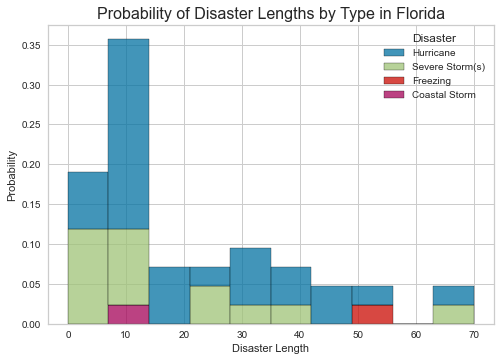

In [10]:
fig, ax = plt.subplots()
sns.histplot(femalength2, x="disasterlength", bins=10, hue = 'Disaster', multiple="stack", stat="probability", ax=ax)
ax.set(xlabel="Disaster Length",
      ylabel="Probability");
ax.set_title("Probability of Disaster Lengths by Type in Florida", fontsize = 16)
plt.savefig("probability.png")

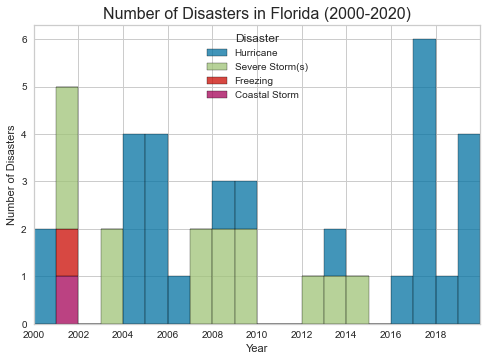

In [11]:
fig, ax = plt.subplots()
sns.histplot(femalength2, x="Year", binwidth=1, hue = 'Disaster', multiple="stack", ax=ax)
ax.set(xlabel="Year",
      ylabel="Number of Disasters");
ax.set_title("Number of Disasters in Florida (2000-2020)", fontsize = 16);
ax.set(xticks=np.arange(2000,2020, step=2), xlim=(2000,2020));
plt.savefig("year.png")

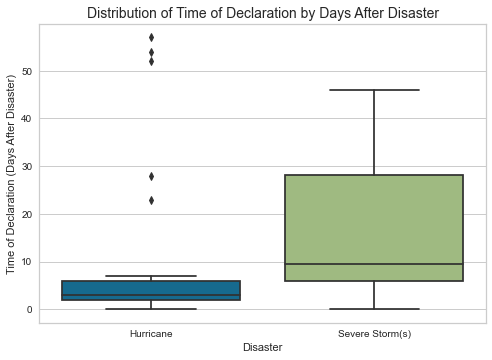

In [12]:
fema4 = femalength2[femalength2.Disaster.isin(["Hurricane", "Severe Storm(s)"])]
fig, ax = plt.subplots()
sns.boxplot(data=fema4, x="Disaster", y="declarationtime")
ax.set(
      ylabel="Time of Declaration (Days After Disaster)");
ax.set_title("Distribution of Time of Declaration by Days After Disaster", fontsize = 14);
plt.savefig("declarationtime.png")

In [13]:
fema4.groupby('Disaster', as_index=False).median()

,Disaster,disasterNumber,Year,disasterlength,declarationtime
0,Hurricane,3335.0,2011.0,15.0,3.0
1,Severe Storm(s),1732.5,2007.5,9.5,9.5


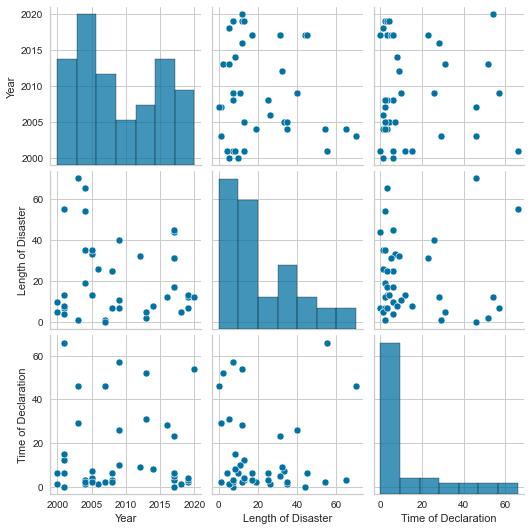

In [14]:
femalength3 = femalength2.drop(columns = ['disasterNumber'])
femalength3 = femalength3.rename(columns={'declarationtime':'Time of Declaration', 
                                         'disasterlength':'Length of Disaster'})
sns.pairplot(femalength3)
plt.savefig("pairplot.png")

In [15]:
fema_counties = pd.read_csv(r"/Users/victoriawarner/Desktop/FEMA__counties.csv")
del fema_counties['Unnamed: 14']
fema_counties.head(5)

,disasterNumber,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsCountyCode,placeCode,designatedArea,declaration_date,incident_begin,incident_end
0,1344,2001,Severe Storm(s),TROPICAL STORM HELENE,0,0,1,1,13,99013,Calhoun (County),11233,11221,11234
1,1344,2001,Severe Storm(s),TROPICAL STORM HELENE,0,0,1,1,5,99005,Bay (County),11233,11221,11234
2,1344,2001,Severe Storm(s),TROPICAL STORM HELENE,0,0,1,1,73,99073,Leon (County),11233,11221,11234
3,1344,2001,Severe Storm(s),TROPICAL STORM HELENE,0,0,1,1,33,99033,Escambia (County),11233,11221,11234
4,1344,2001,Severe Storm(s),TROPICAL STORM HELENE,0,0,1,1,37,99037,Franklin (County),11233,11221,11234


In [16]:
fema_counties.shape

(983, 14)

In [17]:
fema_counties.dtypes

disasterNumber        int64
fyDeclared            int64
incidentType         object
declarationTitle     object
ihProgramDeclared     int64
iaProgramDeclared     int64
paProgramDeclared     int64
hmProgramDeclared     int64
fipsCountyCode        int64
placeCode             int64
designatedArea       object
declaration_date      int64
incident_begin        int64
incident_end          int64
dtype: object

In [18]:
fema_counties['disasterlength']=fema_counties.incident_end-fema_counties.incident_begin
fema_counties['declarationtime']=fema_counties.declaration_date-fema_counties.incident_begin

In [19]:
fema = pd.DataFrame(fema_counties, columns = ['disasterNumber', 'fyDeclared', 'incidentType',
       'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'fipsCountyCode',
       'declaration_date', 'incident_begin', 'incident_end', 'disasterlength',
       'declarationtime'])

In [20]:
NASA_clean = pd.read_csv(r"/Users/victoriawarner/Desktop/NASA_cleaned.csv")
NASA_clean.head(10)

,F1,Time,Precip,index_right,County,COUNTYFP,COUNTYNS,GEOID
0,785566,11700,1.377307,46,Hardee,49,295746,12049
1,785567,11700,1.422008,46,Hardee,49,295746,12049
2,785568,11700,2.205662,46,Hardee,49,295746,12049
3,785563,11700,2.647661,46,Hardee,49,295746,12049
4,785564,11700,1.600960,46,Hardee,49,295746,12049
5,785565,11700,0.923440,46,Hardee,49,295746,12049
6,785560,11700,1.559787,46,Hardee,49,295746,12049
7,785561,11700,1.640607,46,Hardee,49,295746,12049
8,785562,11700,1.393837,46,Hardee,49,295746,12049
9,785557,11700,1.753576,46,Hardee,49,295746,12049


In [21]:
NASA_precip = NASA_clean.groupby(['Time','COUNTYFP'], as_index = False).agg({"Precip":"sum"})
NASA_precip.rename(columns={'Time':'date',
                           'COUNTYFP':'fipsCountyCode',
                           'Precip':'precipitation'}, inplace=True)
NASA_precip.head(10)

,date,fipsCountyCode,precipitation
0,11138,1,83.462032
1,11138,3,107.994505
2,11138,5,243.399351
3,11138,7,22.170107
4,11138,9,515.593921
5,11138,11,154.415838
6,11138,13,91.164940
7,11138,15,5.510221
8,11138,17,422.562270
9,11138,19,137.024177


In [22]:
merged_data = pd.merge(fema, NASA_precip, left_on=['fipsCountyCode','incident_begin'], 
                       right_on=['fipsCountyCode', 'date'], how = 'left')
merged_data.head(10)

,disasterNumber,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsCountyCode,declaration_date,incident_begin,incident_end,disasterlength,declarationtime,date,precipitation
0,1344,2001,Severe Storm(s),0,0,1,1,13,11233,11221,11234,13,12,11221.0,231.740465
1,1344,2001,Severe Storm(s),0,0,1,1,5,11233,11221,11234,13,12,11221.0,467.422299
2,1344,2001,Severe Storm(s),0,0,1,1,73,11233,11221,11234,13,12,11221.0,191.362700
3,1344,2001,Severe Storm(s),0,0,1,1,33,11233,11221,11234,13,12,11221.0,452.590444
4,1344,2001,Severe Storm(s),0,0,1,1,37,11233,11221,11234,13,12,11221.0,615.414363
5,1344,2001,Severe Storm(s),0,0,1,1,129,11233,11221,11234,13,12,11221.0,452.272387
6,1345,2001,Severe Storm(s),0,1,0,1,87,11234,11234,11241,7,0,11234.0,428.287016
7,1345,2001,Severe Storm(s),0,1,0,1,21,11234,11234,11241,7,0,11234.0,1020.581068
8,1344,2001,Severe Storm(s),0,0,1,1,65,11233,11221,11234,13,12,11221.0,138.135606
9,1345,2001,Severe Storm(s),0,1,1,1,86,11234,11234,11241,7,0,11234.0,3971.057500


In [23]:
merged_data = merged_data.dropna()
merged_data.describe()

,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsCountyCode,declaration_date,incident_begin,incident_end,disasterlength,declarationtime,date,precipitation
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,2780.050473,2010.176656,0.355415,0.232387,0.965300,0.631966,68.112513,14852.701367,14845.447950,14874.316509,28.868559,7.253417,14845.447950,293.272383
std,1098.963584,6.190682,0.478891,0.422577,0.183116,0.482524,38.680404,2224.780251,2223.932507,2220.168876,16.454997,11.585378,2223.932507,721.242740
min,1344.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11233.000000,11221.000000,11234.000000,0.000000,0.000000,11221.000000,0.000000
25%,1561.000000,2004.000000,0.000000,0.000000,1.000000,0.000000,35.000000,12687.000000,12685.000000,12739.000000,13.000000,2.000000,12685.000000,4.838580
50%,3220.000000,2008.000000,0.000000,0.000000,1.000000,1.000000,69.000000,14115.000000,14109.000000,14134.000000,25.000000,3.000000,14109.000000,53.483596
75%,3419.000000,2017.000000,1.000000,0.000000,1.000000,1.000000,101.000000,17414.000000,17413.000000,17458.000000,44.000000,6.000000,17413.000000,240.130217
max,4468.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,133.000000,18190.000000,18136.000000,18148.000000,70.000000,57.000000,18136.000000,10005.937872


In [74]:
LE = LabelEncoder()
merged_data['disasterType'] = LE.fit_transform(merged_data['incidentType'])

In [75]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [76]:
feature_names = ['fyDeclared','declarationtime','incident_begin',
                 'fipsCountyCode','disasterlength','precipitation',
                 'incidentType']
X = merged_data[feature_names]
y = merged_data['ihProgramDeclared']

In [77]:
model = Lasso()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('fyDeclared', -0.0), ('declarationtime', -0.0), ('incident_begin', -3.121154493868493e-05), ('fipsCountyCode', 0.0), ('disasterlength', 0.005328492757508104), ('precipitation', 2.0062086586769932e-05), ('incidentType', -0.0)]


In [78]:
model = Ridge()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('fyDeclared', 0.10979845887525914), ('declarationtime', -0.0024618642633220697), ('incident_begin', -0.0003274913862515082), ('fipsCountyCode', 0.000592411811835972), ('disasterlength', 0.010036993992204335), ('precipitation', 3.522050337434428e-05), ('incidentType', -9.885536470904941e-05)]


In [79]:
model = ElasticNet()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('fyDeclared', 0.0), ('declarationtime', -0.0), ('incident_begin', -2.7885370155963516e-05), ('fipsCountyCode', 0.0002580452480056402), ('disasterlength', 0.0072982748989523375), ('precipitation', 2.6217049453765762e-05), ('incidentType', -0.0)]


In [80]:
model = ElasticNet()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('fyDeclared', 0.0), ('declarationtime', -0.0), ('incident_begin', -2.7885370155963516e-05), ('fipsCountyCode', 0.0002580452480056402), ('disasterlength', 0.0072982748989523375), ('precipitation', 2.6217049453765762e-05), ('incidentType', -0.0)]


In [81]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(X,y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['incident_begin', 'disasterlength', 'precipitation']


In [82]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(X,y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['fyDeclared']


In [83]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(X,y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['disasterlength']


[[-2.04515401  1.42184938]
 [-2.07024806  1.60767786]
 [-2.01231958  1.4559282 ]
 ...
 [ 2.83046966  1.71194772]
 [ 2.81816376  1.71309597]
 [ 2.88123185  1.78276602]]


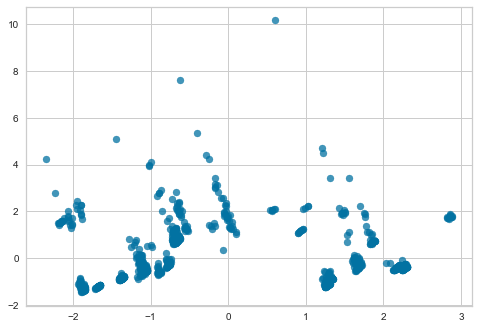

In [84]:
pca = PCA(n_components=2)
new_features = pca.fit(X).transform(X)
print(new_features)

In [85]:
lda = LDA()
new_features = lda.fit(X,y).transform(X)
print(new_features)

[[-0.15372293]
 [-0.13229589]
 [ 0.05189987]
 [-0.03548787]
 [ 0.01332418]
 [ 0.30714296]
 [-0.05822692]
 [-0.16821367]
 [ 0.01205286]
 [ 0.68958161]
 [ 0.07203094]
 [-0.94423899]
 [-1.00688954]
 [-0.51886068]
 [-0.85496577]
 [ 0.25836513]
 [ 0.04567798]
 [-0.82817101]
 [-0.85881127]
 [-1.126884  ]
 [-1.06426587]
 [-1.12937229]
 [-0.75487775]
 [-0.90446332]
 [-1.1733306 ]
 [-0.81973998]
 [-0.97009309]
 [-0.84120393]
 [-0.86860235]
 [-0.65045901]
 [-0.96847431]
 [-0.50833605]
 [-0.83549577]
 [-0.67996393]
 [ 2.12524734]
 [ 2.32685435]
 [ 2.47567644]
 [ 2.15611245]
 [ 2.42691497]
 [ 2.24579754]
 [ 2.35664734]
 [ 2.23048151]
 [ 2.49837021]
 [ 2.168239  ]
 [ 2.10972188]
 [ 0.11894913]
 [-0.5515928 ]
 [-0.48743464]
 [-0.22274955]
 [-0.06332084]
 [-0.36643556]
 [-0.30899351]
 [-0.49867551]
 [-0.19264313]
 [-0.19362403]
 [-0.07514102]
 [-0.39049409]
 [-0.24102018]
 [-0.25399786]
 [-0.40840853]
 [-0.34972431]
 [-0.22514404]
 [-0.41896789]
 [-0.26986239]
 [-0.48200719]
 [-0.23160477]
 [-0.10994

In [86]:
# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

SVC: 0.0
NuSVC: 0.7219662058371736
LinearSVC: 0.9925925925925925
SGDClassifier: 0.9670958512160229
KNeighborsClassifier: 0.8104956268221575
LogisticRegression: 0.9172714078374455
LogisticRegressionCV: 0.0
BaggingClassifier: 0.9584569732937686
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0


In [88]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

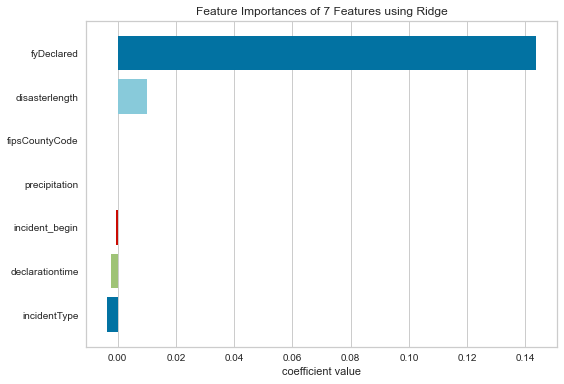

<AxesSubplot:title={'center':'Feature Importances of 7 Features using Ridge'}, xlabel='coefficient value'>

In [89]:
from sklearn.linear_model import Ridge
from yellowbrick.features import FeatureImportances
model = FeatureImportances(
   Ridge(alpha=0.5), relative=False
)
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

In [91]:
feature_names = ['fyDeclared','incident_begin',
                 'fipsCountyCode','disasterlength','precipitation']
X = merged_data[feature_names]
y = merged_data['ihProgramDeclared']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

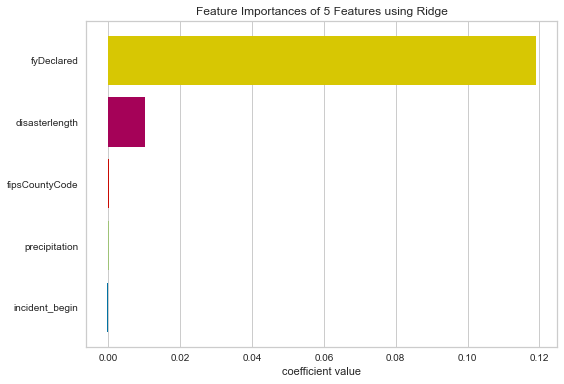

<AxesSubplot:title={'center':'Feature Importances of 5 Features using Ridge'}, xlabel='coefficient value'>

In [92]:
model = FeatureImportances(
   Ridge(alpha=0.5), relative=False
)
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

In [93]:
def plot_classification_report(cr, title='Classification report', cmap=plt.cm.Reds):

    lines = cr.split('\n')
    classes = []
    plotMat = []

    for line in lines[2 : (len(lines) - 5)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    fig, ax = plt.subplots(figsize=(10,5))
    fig = plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    
    for c in range(len(plotMat)+1):
        for r in range(len(classes)):
            try:
                txt = plotMat[r][c]
                ax.text(c,r,plotMat[r][c],va='center',ha='center')
            except IndexError:
                pass
            
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes)-1)
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
        
    plt.yticks(y_tick_marks, classes)
   
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [94]:
#scaler = StandardScaler()
#merged_data['fyDeclared'] = scaler.fit_transform(merged_data[['fyDeclared']])
#merged_data['declarationtime'] = scaler.fit_transform(merged_data[['declarationtime']])
#merged_data['disasterlength'] = scaler.fit_transform(merged_data[['disasterlength']])
#merged_data['precipitation']= scaler.fit_transform(merged_data[['precipitation']])

In [95]:
df = pd.DataFrame(merged_data, columns = ['fyDeclared','declarationtime','disasterlength','precipitation', 'disasterType'])
corrMatrix = df.corr()
print(corrMatrix)

                 fyDeclared  declarationtime  disasterlength  precipitation  \
fyDeclared         1.000000         0.089534       -0.254829      -0.055152   
declarationtime    0.089534         1.000000       -0.167606       0.175678   
disasterlength    -0.254829        -0.167606        1.000000      -0.111412   
precipitation     -0.055152         0.175678       -0.111412       1.000000   
disasterType      -0.141408         0.132562       -0.054649       0.304271   

                 disasterType  
fyDeclared          -0.141408  
declarationtime      0.132562  
disasterlength      -0.054649  
precipitation        0.304271  
disasterType         1.000000  


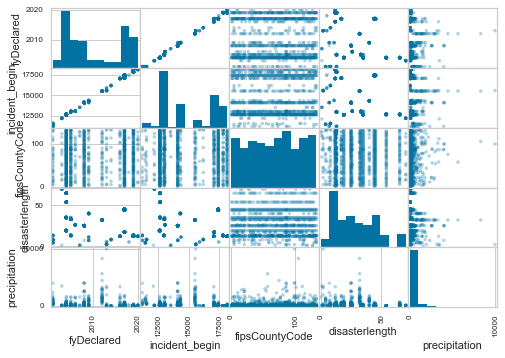

In [96]:
pd.plotting.scatter_matrix(X, alpha=0.3)
plt.savefig("features.png")

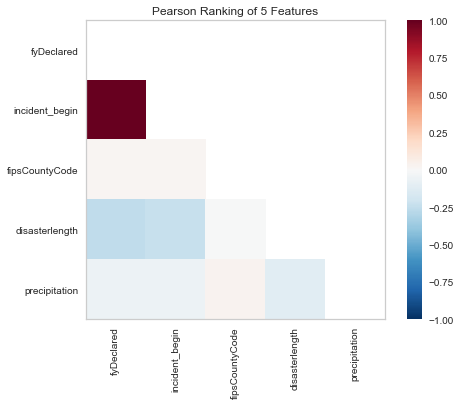

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [97]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [98]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
expected   = y_test
predicted  = logreg.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Not Declared", "Declared"])
print(classificationReport)

Accuracy of Logistic regression classifier on training set: 0.63
Accuracy of Logistic regression classifier on test set: 0.65
              precision    recall  f1-score   support

Not Declared       0.74      0.68      0.71       149
    Declared       0.53      0.61      0.57        89

    accuracy                           0.65       238
   macro avg       0.64      0.64      0.64       238
weighted avg       0.66      0.65      0.66       238



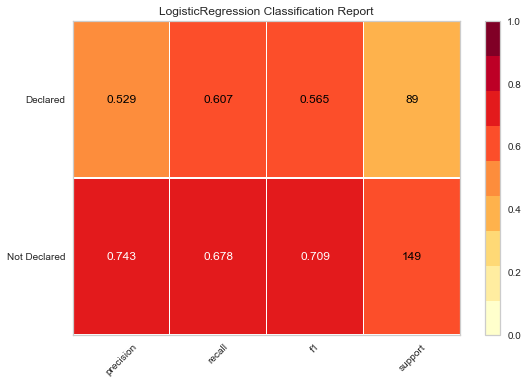

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [99]:
classes = ["Not Declared", "Declared"]
visualizer = ClassificationReport(logreg, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

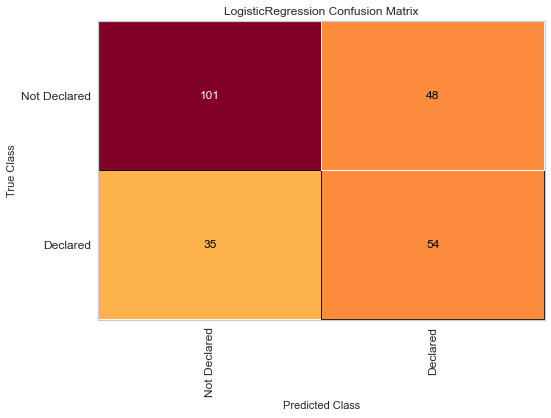

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [100]:
cm = ConfusionMatrix(logreg, classes=['Not Declared','Declared'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

In [101]:
forest = RandomForestClassifier(random_state=0, n_estimators=50)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

expected   = y_test
predicted  = forest.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Not Declared", "Declared"])
print(classificationReport)

Accuracy on training set: 0.962
Accuracy on test set: 0.773
              precision    recall  f1-score   support

Not Declared       0.81      0.83      0.82       149
    Declared       0.70      0.69      0.69        89

    accuracy                           0.77       238
   macro avg       0.76      0.76      0.76       238
weighted avg       0.77      0.77      0.77       238



In [102]:
#Features importance for RandomForest
print("Feature importances:\n{}".format(forest.feature_importances_))

Feature importances:
[0.10218367 0.17452761 0.21803236 0.2077803  0.29747606]


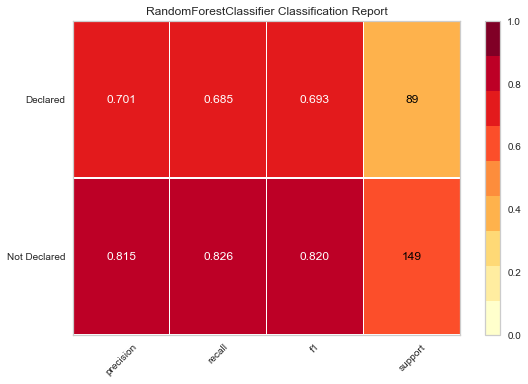

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [103]:
classes = ["Not Declared", "Declared"]
visualizer = ClassificationReport(forest, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

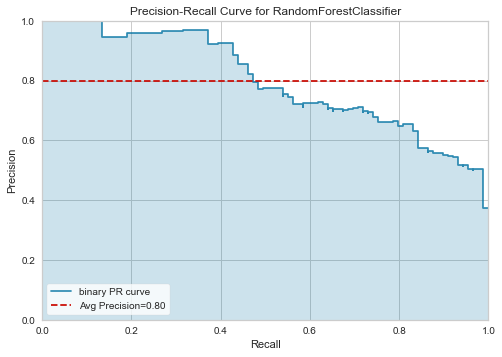

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [104]:
viz = PrecisionRecallCurve(forest)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

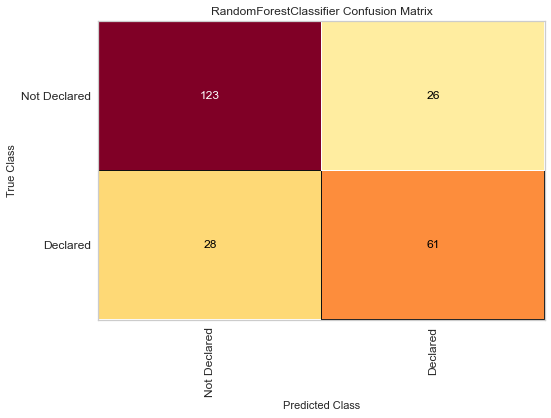

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [105]:
cm = ConfusionMatrix(forest, classes=["Not Declared", "Declared"])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

In [106]:
clf = DecisionTreeClassifier(max_depth=30, class_weight="balanced").fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

expected   = y_test
predicted  = clf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Not Declared", "Declared"])
print(classificationReport)

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.74
              precision    recall  f1-score   support

Not Declared       0.78      0.83      0.80       149
    Declared       0.68      0.61      0.64        89

    accuracy                           0.74       238
   macro avg       0.73      0.72      0.72       238
weighted avg       0.74      0.74      0.74       238



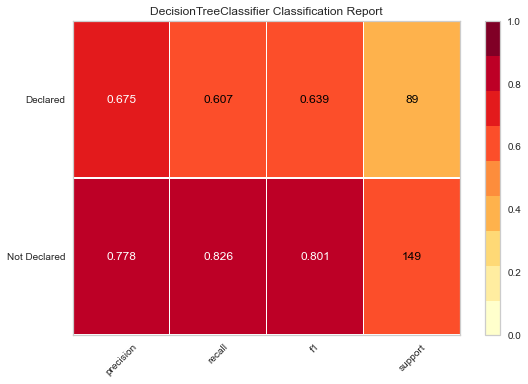

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [107]:
classes = ["Not Declared", "Declared"]
visualizer = ClassificationReport(clf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

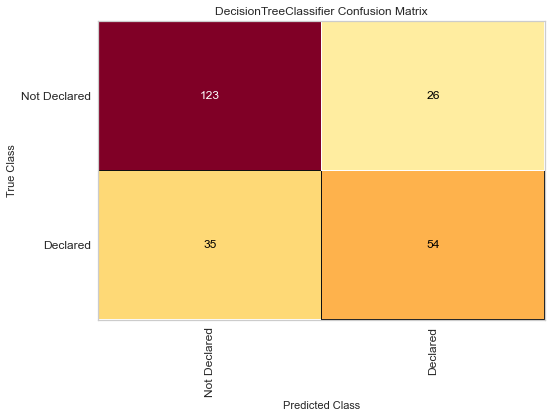

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [108]:
cm = ConfusionMatrix(clf, classes=['Not Declared','Declared'])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

In [109]:
clf = HistGradientBoostingClassifier().fit(X,y)
clf.score(X,y)

0.943217665615142

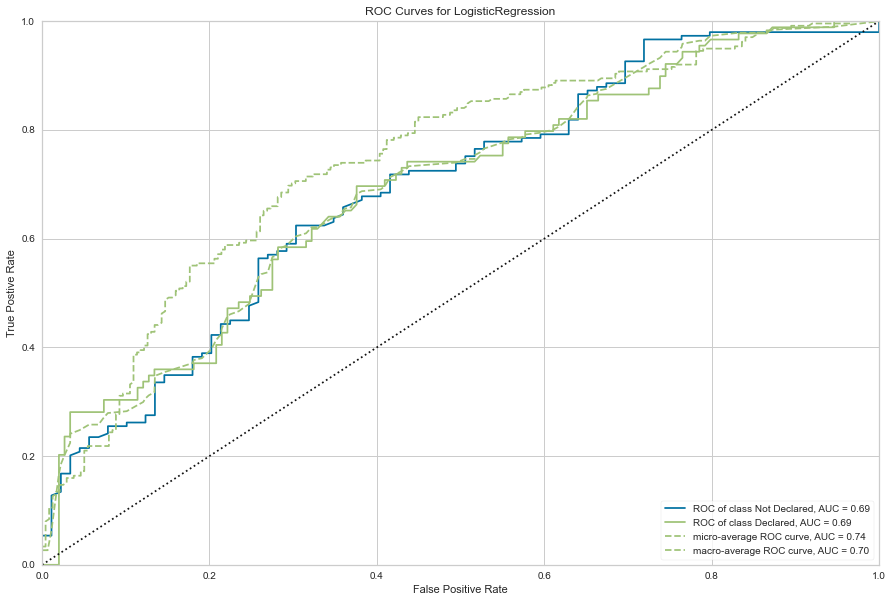

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [110]:
# Instantiate the visualizer with the classification model
classes = ["Not Declared", "Declared"]
visualizer = ROCAUC(LogisticRegression(
    multi_class="auto", solver="liblinear"
    ), classes=classes, size=(1080, 720)
)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

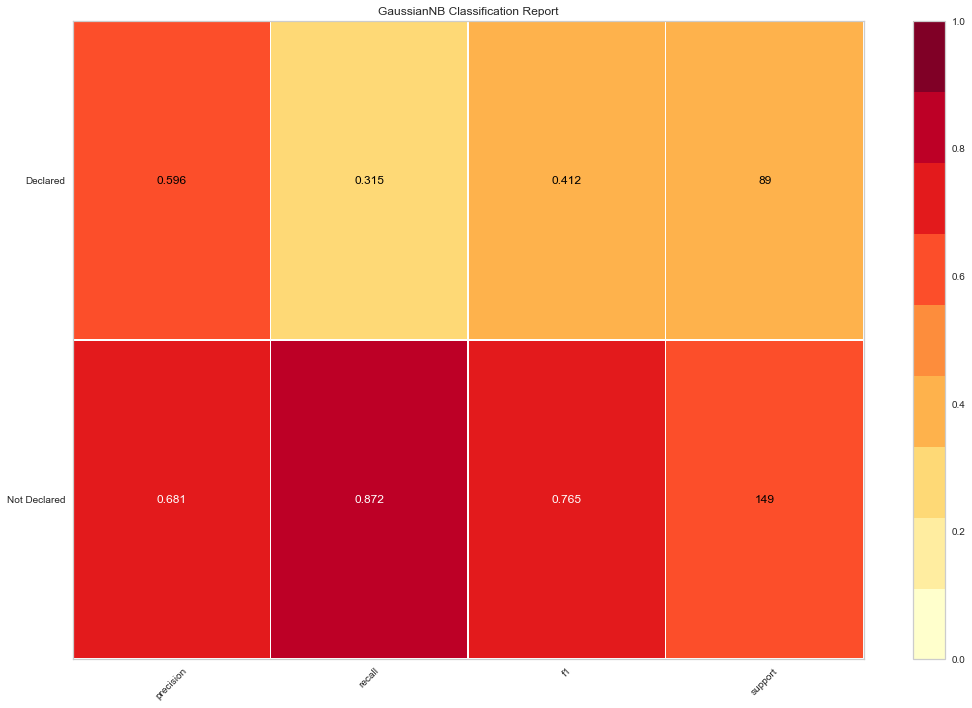

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [111]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(
    bayes, classes=classes, support=True, size=(1080, 720)
)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

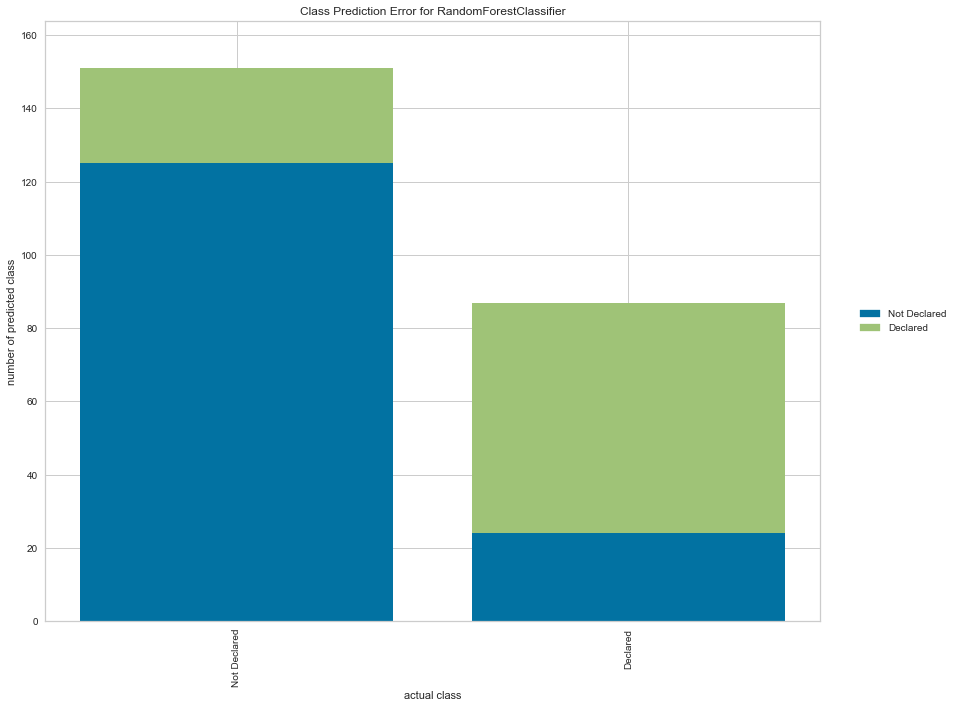

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [112]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=10), 
    classes=classes, size=(1080, 720)
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

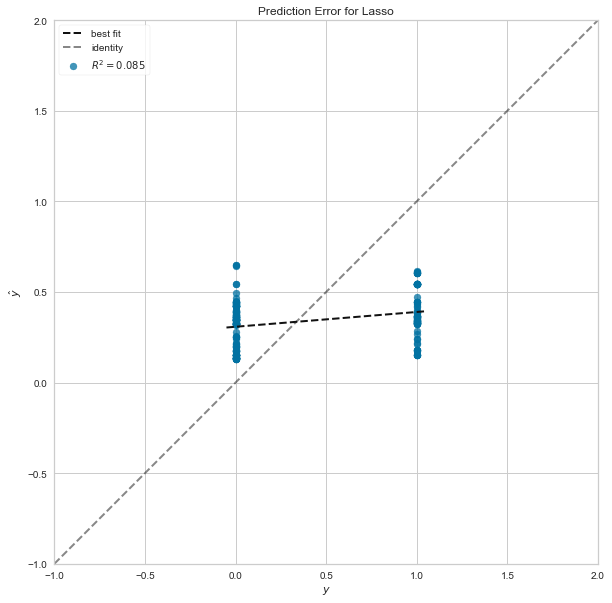

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [113]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError
model = Lasso()
visualizer = PredictionError(model, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

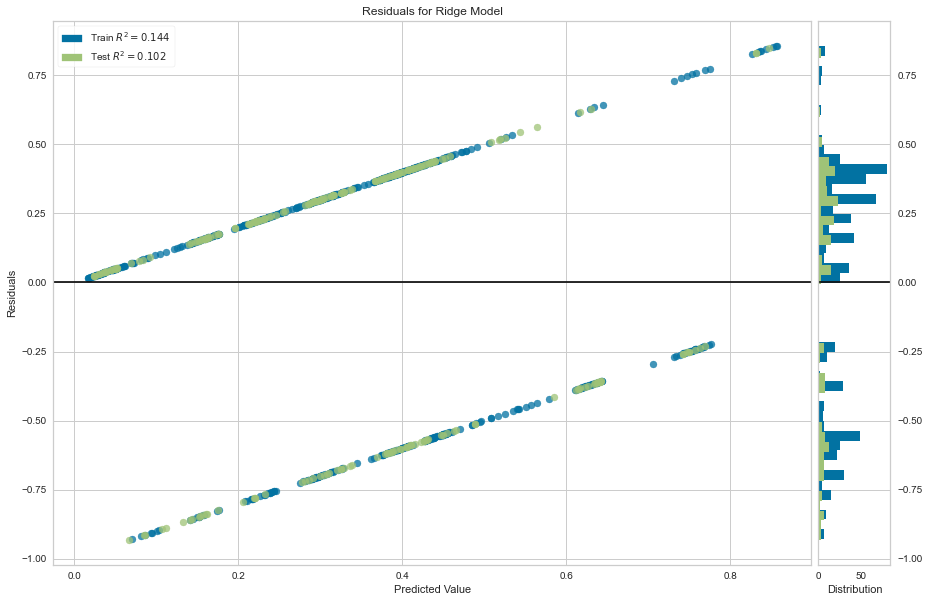

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [114]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

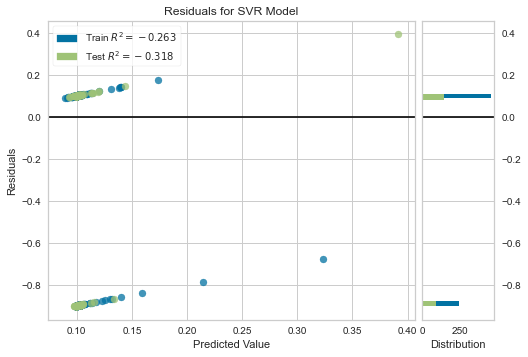

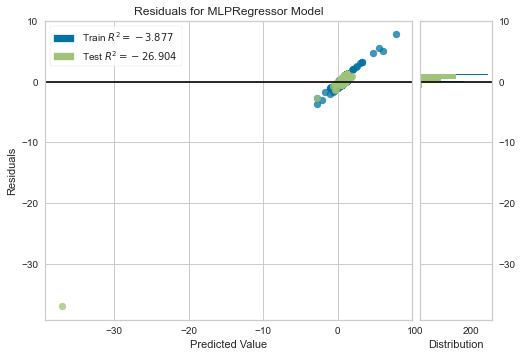

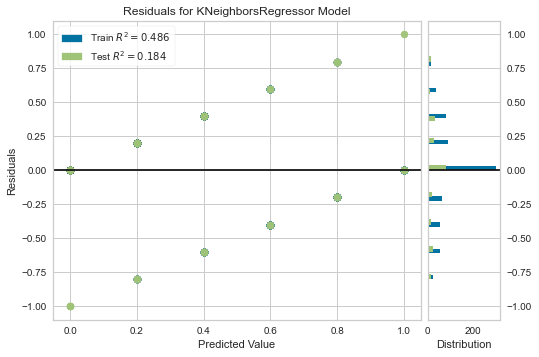

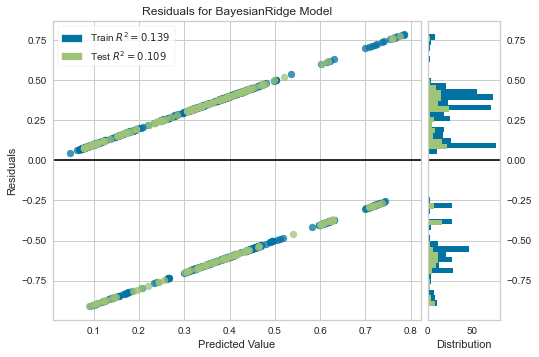

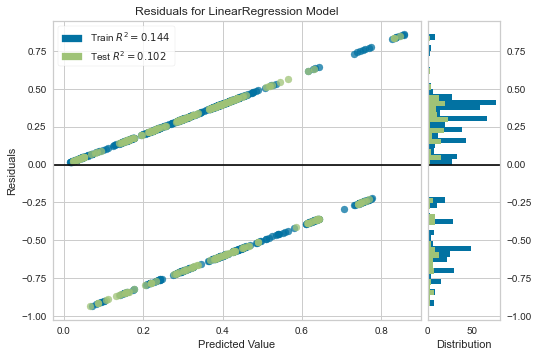

In [115]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression

regressors = {
    "support vector machine": SVR(),
    "multilayer perceptron": MLPRegressor(),
    "nearest neighbors": KNeighborsRegressor(),
    "bayesian ridge": BayesianRidge(),
    "linear regression": LinearRegression(),
}

for _, regressor in regressors.items():
    visualizer = ResidualsPlot(regressor)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

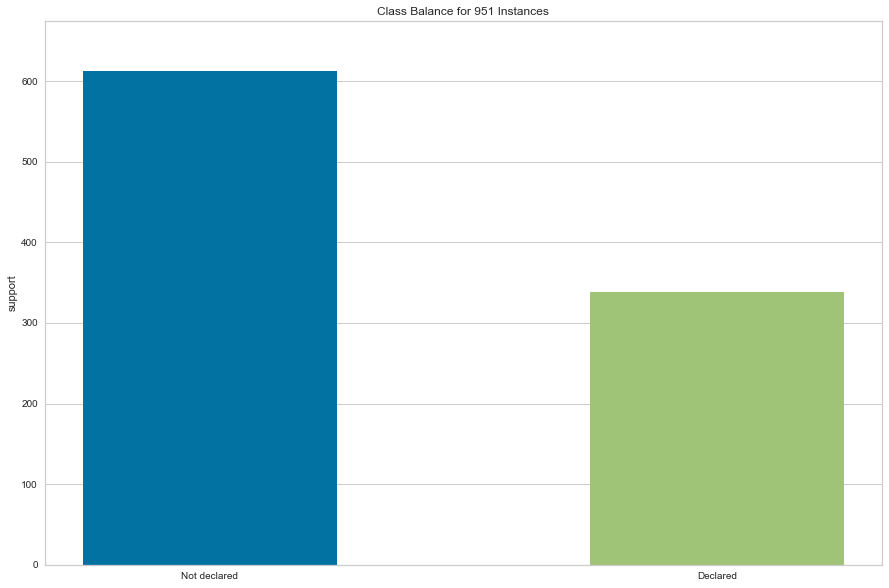

<AxesSubplot:title={'center':'Class Balance for 951 Instances'}, ylabel='support'>

In [116]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(
    labels=["Not declared","Declared"], size=(1080, 720)
)

visualizer.fit(y)
visualizer.show()

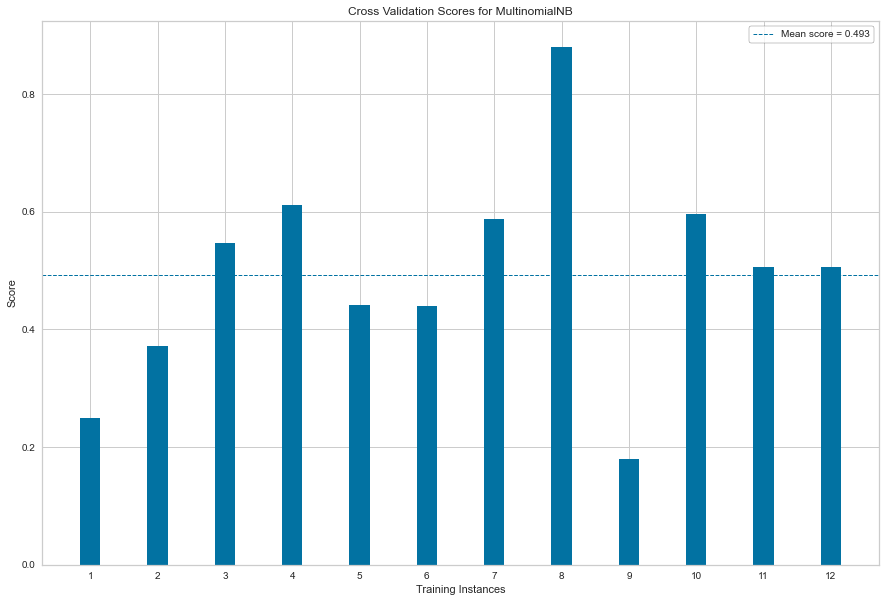

<AxesSubplot:title={'center':'Cross Validation Scores for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X, y)
visualizer.show()

In [118]:
from sklearn.model_selection import GridSearchCV

model = Ridge(random_state=0)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_params = [{'alpha': alphas}]
n_folds = 5

grid = GridSearchCV(model, tuned_params, cv=n_folds)

grid.fit(X, y)
print(grid.best_estimator_)

Ridge(alpha=1000, random_state=0)


In [119]:
# Use GridSearchCV to see whether we need to tune any of the Ridge parameters.
model = Ridge(random_state=0)

# Create a dictionary with the Ridge parameter options
# We will explicitly tune our possible `solver` so that "auto" is not returned.
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True,False], 
              'normalize':[True,False], 'copy_X':[True, False], 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg']}

clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X, y)

print(clf.best_estimator_)

Ridge(alpha=1, normalize=True, random_state=0, solver='lsqr')


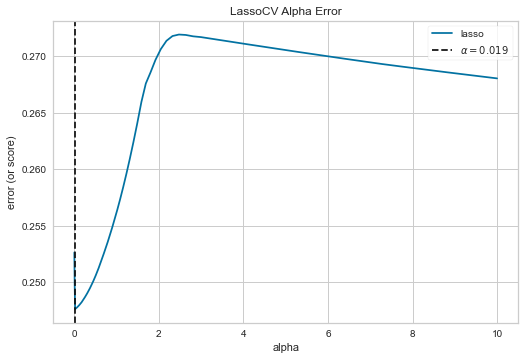

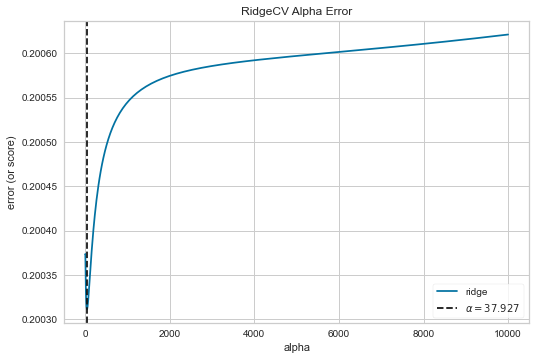

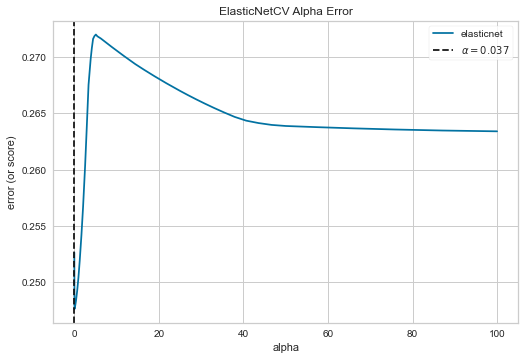

In [120]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from yellowbrick.regressor import AlphaSelection
# Create some lists of alphas to cross-validate against
small_range = np.logspace(-10, 1, 400)
medium_range = np.logspace(-10, 2, 400)
large_range = np.logspace(-10, 4, 400)

smoothers = {
    "Lasso": LassoCV(cv=5, alphas=small_range),
    "Ridge": RidgeCV(store_cv_values=True, alphas=large_range),
    "ElasticNet": ElasticNetCV(cv=5, alphas=medium_range)
}

for _, smoother in smoothers.items():
    _, ax = plt.subplots() # Create a new figure
    visualizer = AlphaSelection(smoother, size=(600, 400))
    visualizer.fit(X, y)
    visualizer.show()

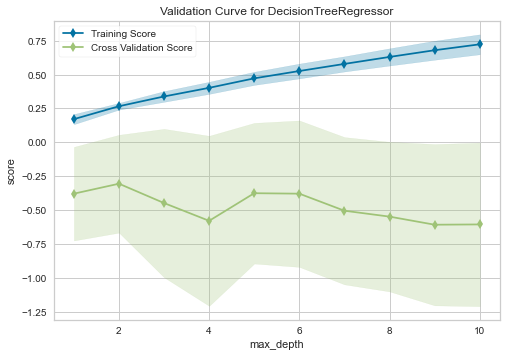

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [121]:
from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor
viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

In [122]:
def plot_decision(mdl, X, y, score=None):
    _, ax = plt.subplots(figsize=(9,6))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - (X[:, 0].min() * .01), X[:, 0].max() + (X[:, 0].max() * .01)
    y_min, y_max = X[:, 1].min() - (X[:, 1].min() * .01), X[:, 1].max() + (X[:, 1].max() * .01)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    # set the step increment for drawing the boundary graph
    x_step = (x_max - x_min) * 0.0025
    y_step = (y_max - y_min) * 0.0025

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

    # raise Exception(self.yy.ravel().shape)
    Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    mesh = ax.pcolormesh(xx, yy, Z, alpha=0.75)
    
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='#CCCCCC')
    
    ax.set_xlabel("$X_0$")
    ax.set_ylabel("$X_1$")
    
    est = mdl if not isinstance(mdl, Pipeline) else mdl.steps[-1][1]
    deg = 1 if not isinstance(mdl, Pipeline) else mdl.steps[0][1].degree
    name = "{} (degree={})".format(est.__class__.__name__, deg)
    if score:
        name += " $R^2={:0.3f}$".format(score)
    ax.set_title("{}".format(name))
    
    cbar = plt.colorbar(mesh, label="$\hat{y}$")
    
    return ax

In [123]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit(X, y)
visualizer.transform(X)

# Finalize the title and axes then display the visualization
visualizer.show()

NameError: name 'ParallelCoordinates' is not defined

In [ ]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', # This time we'll specify a normalizer
    sample=0.05, shuffle=True, size=(1080, 720)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.show()

In [ ]:
from yellowbrick.features.manifold import Manifold

visualizer = Manifold(
    manifold='mds', target='continuous', size=(1080, 720)
)
visualizer.fit_transform(X, y)
visualizer.show()